In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#READING DATA----------------------------------------------
dados = np.load('save/dataset.npz')
dataset = dados['dataset']
classification = dados['classification']

[dataset_train,dataset_test,classification_train,classification_test] = train_test_split(dataset,classification)

In [ ]:
#RANDOM FOREST---------------------------------------------

param_grid = {
    'n_estimators': [500,1000,3000],                         
    'criterion': ['gini','entropy'],              
    'max_depth': [50,150,300],                          
    'max_samples': [None]                
}

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid ,scoring=['accuracy', 'precision', 'recall', 'roc_auc'], refit='accuracy',verbose = 2, cv=2)
rfc_grid.fit(dataset_train, classification_train)
rfc_results = pd.DataFrame(rfc_grid.cv_results_)

rfc_results.to_csv("C:/Temp/aca/rfc_results.csv")
rfc_results.to_pickle('rfc_results.pkl')

In [ ]:
#SVM------------------------------------------------------

param_grid = {'C': [0.1,10,100], 
              'gamma': [0.01,0.1,1],
              'kernel': ['poly','rbf'],
              'degree': [2,3,4]}

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid ,scoring=['accuracy', 'precision', 'recall', 'roc_auc'], refit='accuracy',verbose = 2, cv=2)
clf.fit(dataset_train, classification_train)
svm_results = pd.DataFrame(clf.cv_results_)

svm_results.to_csv("svm_results.csv")
svm_results.to_pickle('svm_results.pkl')

In [ ]:
#MLP------------------------------------------------------

parameters = {'solver': ['adam'], 'max_iter': [1000,1500,2000], 'alpha': [0.1,0.05,1], 'hidden_layer_sizes': [(200,), (500,)], 'random_state':[1,3,5]}

MLP_best = GridSearchCV(MLPClassifier(), parameters,scoring=['accuracy', 'precision', 'recall', 'roc_auc'], refit='accuracy',verbose = 2, cv=2)
MLP_best.fit(dataset_train, classification_train)
mlp_results = pd.DataFrame(MLP_best.cv_results_)

mlp_results.to_csv("mlp_results.csv")
mlp_results.to_pickle('mlp_results.pkl')

In [ ]:
#KNN-------------------------------------------------------

param_grid = {
    'n_neighbors': [1,3,5],                         
    'weights': ['uniform', 'distance'],              
    'algorithm': ['auto','kd_tree'],                          
    'p': [1,2]                
}

knn = KNeighborsClassifier()
knn_best = GridSearchCV(knn, param_grid, scoring=['accuracy', 'precision', 'recall', 'roc_auc'],cv=2, refit='accuracy',verbose=2)
knn_best.fit(dataset_train, classification_train)
knn_results = pd.DataFrame(knn_best.cv_results_)

knn_results.to_csv("C:/Temp/aca/knn_results.csv")
knn_results.to_pickle('knn_results.pkl')

In [ ]:
#GNB------------------------------------------------------

parameters = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}

gnb_clf = GaussianNB()
gnb_best = GridSearchCV(gnb_clf, parameters, scoring=['accuracy', 'precision', 'recall', 'roc_auc'],cv=5, refit='accuracy',verbose=2)
gnb_best.fit(dataset_train, classification_train)
gnb_results = pd.DataFrame(gnb_best.cv_results_)

gnb_results.to_csv("gnb_results.csv")
gnb_results.to_pickle('gnb_results.pkl')

C:\Users\Gustavo Luizon\AppData\Local\Temp\ipykernel_11508\308034733.py:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  plot_data['params'] = plot_data['params'].str.replace("{","").str.replace("'","").str.replace("}","")


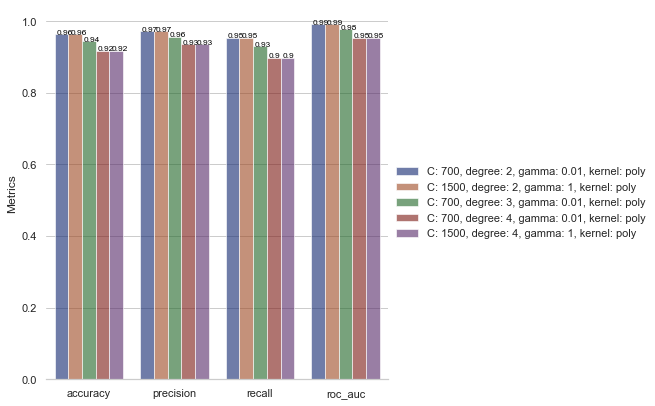

In [4]:
#PLOT------------------------------------------------------

#RF
# results = pd.read_pickle('save/rfc_results.pkl')
# samples = np.array([17,10,9,6,3])
#SVM
results = pd.read_pickle('save/svm_results.pkl')
samples = np.array([0,20,3,6,26])
#MLP
#results = pd.read_pickle('save/mlp_results.pkl')
#samples = np.array([28,10,18,11,52])
#KNN
#results = pd.read_pickle('save/knn_results.pkl')
#samples = np.array([0,4,2,18,22])
#GNB
#results = pd.read_pickle('save/gnb_results.pkl')
#samples = np.array([0,1,2,3,4])


plot_data = results.copy()
#n_amostras = 5


#RESULT SELECTION
plot_data = plot_data.iloc[samples]
plot_data['id'] = np.arange(len(plot_data))
plot_data = plot_data[['id','params','mean_fit_time','std_fit_time','mean_score_time','std_score_time','mean_test_accuracy','rank_test_accuracy','mean_test_precision','rank_test_precision','mean_test_recall','rank_test_recall','mean_test_roc_auc','rank_test_roc_auc']]
plot_data = pd.melt(plot_data, id_vars=['id','params'], value_vars=['mean_test_accuracy','mean_test_precision','mean_test_recall','mean_test_roc_auc'])
plot_data = plot_data.sort_values(by=['id'])
plot_data['params'] = pd.Series(plot_data['params'], dtype="string")
plot_data['variable'] = pd.Series(plot_data['variable'], dtype="string")
plot_data['params'] = plot_data['params'].str.replace("{","").str.replace("'","").str.replace("}","")
plot_data['variable'] = plot_data['variable'].str.replace("mean_test_","")

#RESULT PLOT
sns.set_theme(style="whitegrid")
g = sns.catplot(data=plot_data, kind="bar",x="variable", y="value", hue="params",ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Metrics")
g.legend.set_title("")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.02, 
            p.get_height()*1.0,
            round(p.get_height(),2), 
            color='black', 
            rotation='horizontal', 
            size='x-small')

plt.show()

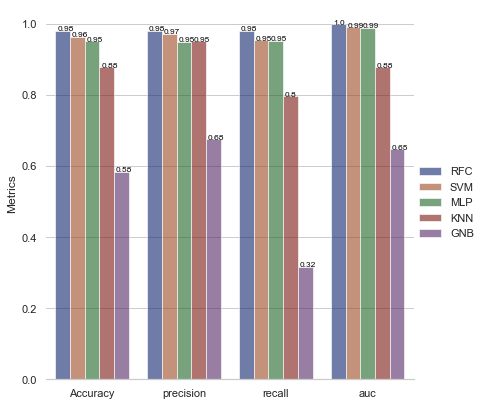

In [5]:
#PLOTS--------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

rfc_acc = 0.9808
rfc_prec = 0.9806
rfc_recall = 0.9809
rfc_auc = 0.9979

svm_acc = 0.9626
svm_prec = 0.9712
svm_recall = 0.9532
svm_auc = 0.9905

mlp_acc = 0.9502
mlp_prec = 0.9490
mlp_recall = 0.9516
mlp_auc = 0.9884

knn_acc = 0.8778
knn_prec = 0.9507
knn_recall = 0.7960
knn_auc = 0.8775

gnb_acc = 0.5837
gnb_prec = 0.6751
gnb_recall = 0.3169
gnb_auc = 0.6465


sns.set_theme(style="whitegrid")

plot_data = pd.DataFrame({
    'classifier': ['RFC','RFC','RFC','RFC','SVM','SVM','SVM','SVM','MLP','MLP','MLP','MLP','KNN','KNN','KNN','KNN','GNB','GNB','GNB','GNB'],
    'metric': ['Accuracy','precision','recall','auc','Accuracy','precision','recall','auc','Accuracy','precision','recall','auc','Accuracy','precision','recall','auc','Accuracy','precision','recall','auc'],
    'value': [rfc_acc,rfc_prec,rfc_recall,rfc_auc,svm_acc,svm_prec,svm_recall,svm_auc,mlp_acc,mlp_prec,mlp_recall,mlp_auc,knn_acc,knn_prec,knn_recall,knn_auc,gnb_acc,gnb_prec,gnb_recall,gnb_auc]
})

g = sns.catplot(
    data=plot_data, kind="bar",
    x="metric", y="value", hue="classifier",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Metrics")
g.legend.set_title("")

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.02, 
            p.get_height()*1.0,
            round(p.get_height(),2), 
            color='black', 
            rotation='horizontal', 
            size='x-small')

plt.show()